# Notes on the Beta and Dirichlet Distributions

In [13]:
#hide
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import multinomial
from scipy.stats import dirichlet

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
%config InlineBackend.figure_format = 'retina'

## Binomial Distribution 

The Binomial describes the number of successes in a binary task. It is parametized by the probability of success, $p$, and the number of trials, $n$.

### Example: Favourite Colour

Suppose we have an experiment where we ask $n$ random people if their favourite color is blue. The number of people whose favourite colour is blue, is governed by a Binomial distribution. The parameter $p$ being the probability of someone's favourite color being blue. 

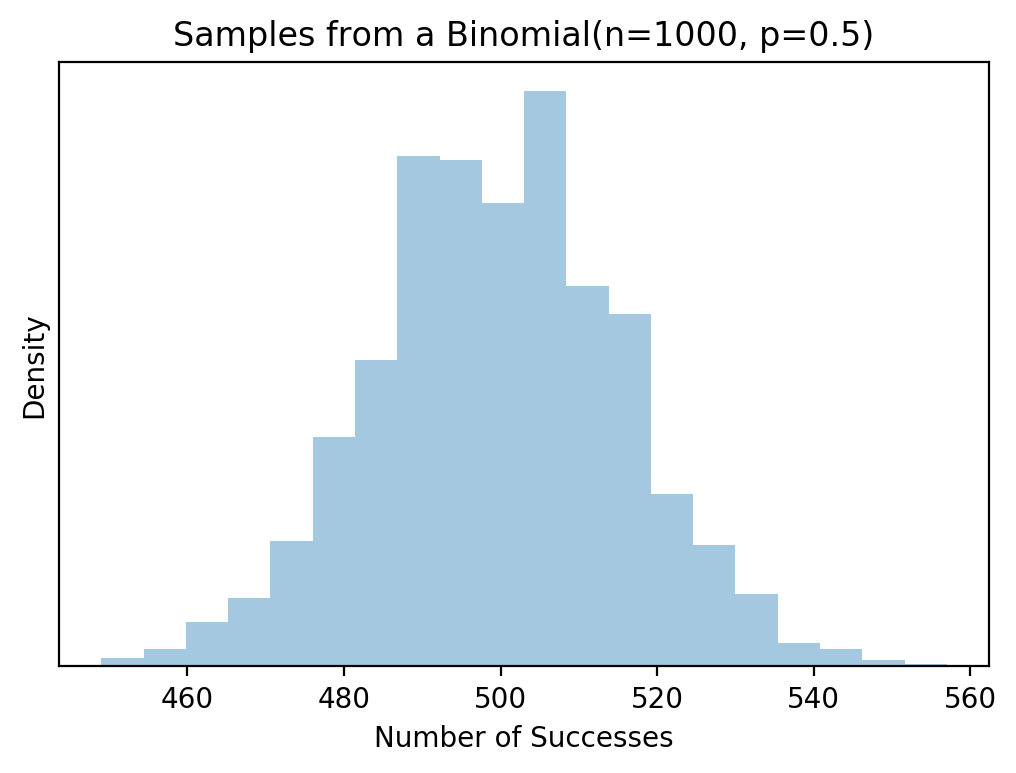

In [79]:
# samples from a Binomial(n, p) are number of successes
binom_rvs = binom.rvs(n= 1000, p = 0.5, size=5000)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), sharex = True)
sns.distplot(binom_rvs, kde = False, bins = 20)
plt.title("Samples from a Binomial(n=1000, p=0.5)")
plt.xlabel("Number of Successes");
plt.ylabel("Density")
#plt.xticks([])
plt.yticks([]);

## Beta Distribution 

In order to use the Binomial as a likelihood function for a Bayesian model, we must have a prior on the parameter $p$. It's possible to just use any probability density with domain $[0, 1]$, however we prefer a distribution that would provide an analytic posterior. For a Binomial likelihood, this distribution is the Beta distribution.

The Beta distribution is the conjugate prior for the Binomial. Samples from the Beta distribution can be thought of as potential probabilities of success for a Binomial distribution. A sample from a Beta distribution is one number between $(0, 1)$.


### Example: Favourite Colour

In our favourite colour example, the Beta distribution will provide potential values of $p$ before we ask people about their favourite color (before we gather data). The most important property that these "potential values" have to satisfy is that they are between $(0, 1)$.

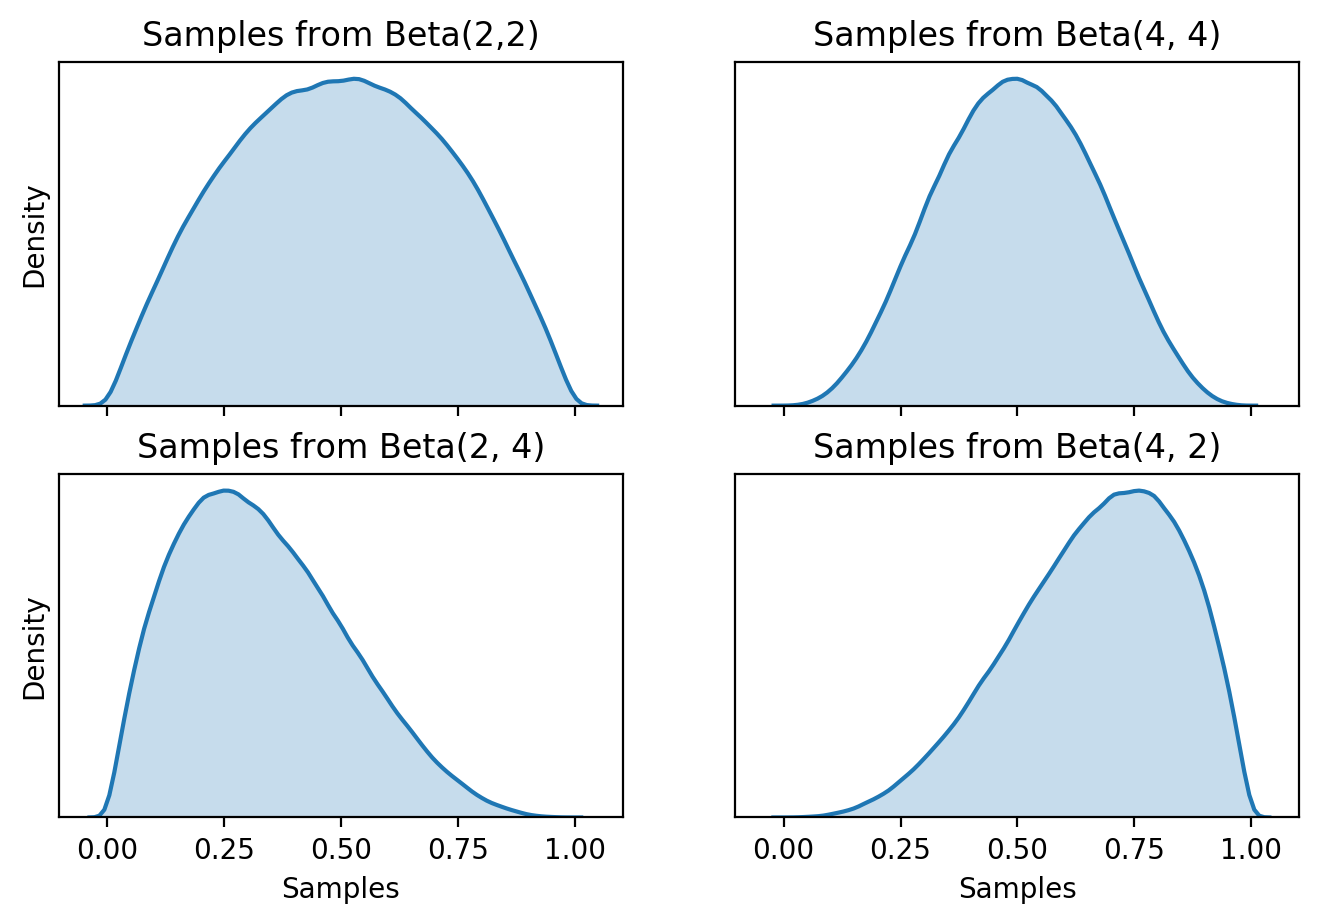

In [77]:
# samples from Beta(a, b) are probabilities
n = int(5e5) # number of samples
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 5), sharex = True)

sns.distplot(beta.rvs(2, 2, size = n), 
             hist = False,
#             color="r",
             kde_kws={"shade": True},
             ax = ax[0, 0]).set_title("Samples from Beta(2,2)")

sns.distplot(beta.rvs(4, 4, size = n), 
             hist = False,
             kde_kws={"shade": True},
             ax = ax[0, 1]).set_title("Samples from Beta(4, 4)")

sns.distplot(beta.rvs(2, 4, size = n), 
             hist = False,
             kde_kws={"shade": True},
             ax = ax[1, 0]).set_title("Samples from Beta(2, 4)")

sns.distplot(beta.rvs(4, 2, size = n), 
             hist = False,
             kde_kws={"shade": True},
             ax = ax[1, 1]).set_title("Samples from Beta(4, 2)");

ax[0,0].set_yticks([]);
ax[0,1].set_yticks([]);
ax[1,0].set_yticks([]);
ax[1,1].set_yticks([]);

ax[0,0].set_ylabel("Density")
ax[1,0].set_ylabel("Density");
ax[1,0].set_xlabel("Samples");
ax[1,1].set_xlabel("Samples");

## Multinomial Distribution 

A limitation of the Binomial distribution is we only have 2 potential outcomes. The Multinormial distribution is a generalization of this, where we can have $k$ possible outcomes. It is parameterized by the number of trials, $n$ and the probability of success for each outcome $p_i$. Each sample from a Multinomial is a vector of length $k$, where each index corresponds to the number of successes for that outcome.

### Example: Favourite Colour

We used the Binomial distribution to find out if people's favourite colour is blue, but this didn't give us much information on what other colours people liked. 
Now we want more information. We're interested in the distribution of people whose favourite colours are either: blue, green, red or yellow. If we ask $n$ people to choose their favourite color from one of these, the number of successes for each colour will follow a Multinomial distribution. Each parameter, $p_{blue}, p_{green}, p_{red}, p_{yellow}$ is the probability of that colour being a random person's favourite.

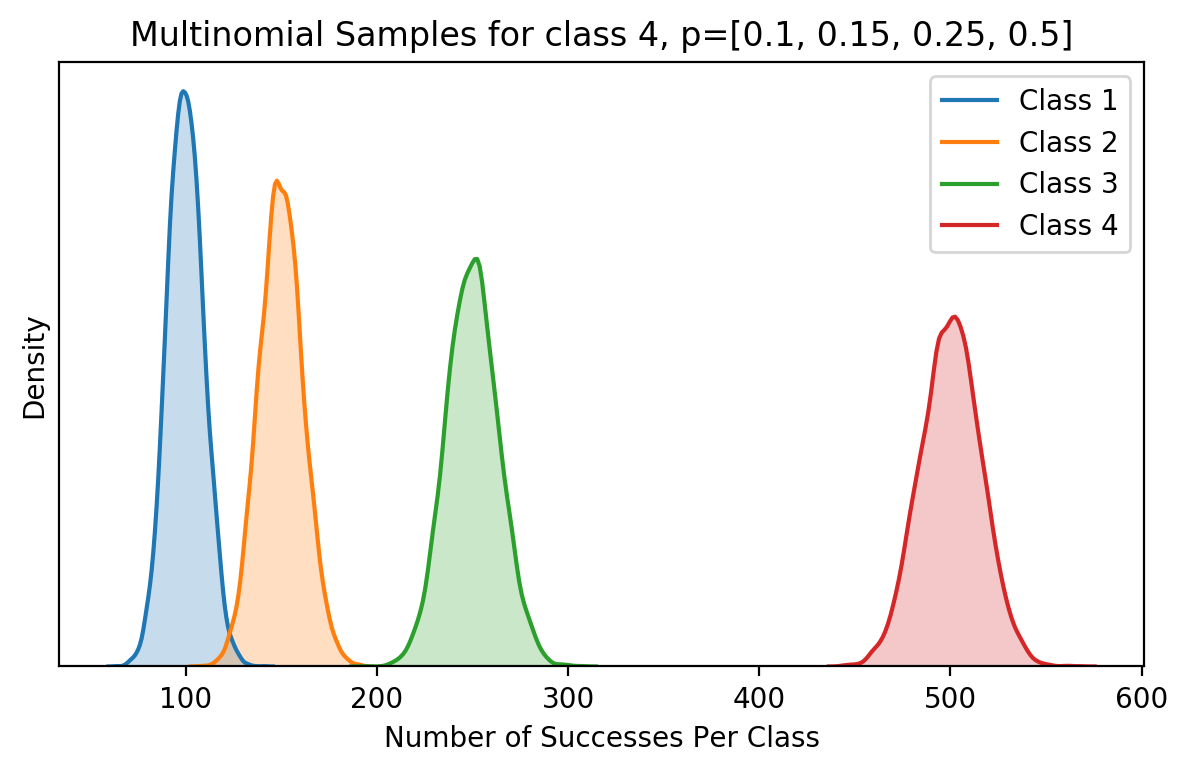

In [81]:
# samples from a multinomial are success counts for each outcome
_p = [0.1, 0.15, 0.25, 0.5]
multinom_rvs = multinomial.rvs(n=1000, p=_p, size = 10000)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 4), sharex = True)
sns.distplot(multinom_rvs[:, 0], 
             hist = False,
             kde_kws={"label": "Class 1", "shade": True})

sns.distplot(multinom_rvs[:, 1], 
             hist = False,
             kde_kws={"label": "Class 2", "shade": True})

sns.distplot(multinom_rvs[:, 2], 
             hist = False,
             kde_kws={"label": "Class 3", "shade": True})

sns.distplot(multinom_rvs[:, 3], 
             hist = False,
             kde_kws={"label": "Class 4", "shade": True}).set_title("Multinomial Samples for class 4, p=[0.1, 0.15, 0.25, 0.5]");

plt.yticks([]);
plt.ylabel("Density")
plt.xlabel("Number of Successes Per Class");

## Dirichlet Distribution

The Dirichlet distiribution is to the Multinormial as the Beta is the the Binomial and is a generalization of the Beta distribution. Samples from a Dirichlet distribution can be thought of as probabilities corresponding to outcomes of a Multinomial distribution. An important property of this distribution is that each sample sums to 1.

##### How do we always sum to 1?
Let's take a Dirichlet distribution with 5 components, meaning that samples from this distribution will be a vector of length 5, whose sum is 1: 

$$ X \sim Dir([\alpha_1, \alpha_2, \alpha_3, \alpha_4, \alpha_5]) $$

Two samples from $X$:
$$ x_1 = [0.3, 0.15, 0.05, 0.25, 0.25] $$
$$ x_2 = [0.13, 0.17, 0.05, 0.2, 0.45] $$

Two things are consistent: $\sum_{i=1}^{5} x_i = 1$ and len(x) = $5$. So we can imagine that each sample from a Dirichlet distribution is a literal stick of length 1, that is (literally) broken into $5$ sections. Each section (or class) has a length, for example section 2 in $x_1$ has length $0.15$. Each sample, $x_1$, $x_2$, etc. can have different lengths for each section. All the Dirichlet distribution does is propose different ways of breaking this stick into 5 pieces. Of course there is a specific way of breaking the stick to generate samples from the Distribution, which is very aptly named the [stick breaking construction](https://www.stats.ox.ac.uk/~teh/research/npbayes/Teh2010a.pdf).

The next logical step from here is to ask the question: why 5 pieces? What if we don't know how many pieces we want? So really we want a distribution to propose breaking this stick in any way possible, 3 pieces, 100 pieces, 1e10 places. This is what the Dirichlet process is used for. 


### Example: Favourite Colour

In the Multinomial favourite colour example, we now have 4 parameters representing the probability of each outcome (colour), $p = (p_1, p_2, p_3, p_4)$. A distribution over $p$ before observing the data needs to take into consideration that $\sum_{i=1}^{k}p_i = 1$. This is exactly what the Dirichlet distribution provides. 


### Another View: Distribution over Distributions

Suppose we have an arbitrary experiment with $k$ outcomes, that each happen with probability $p_i$. Every time we repeat this experiment, we get a distribution (probability mass function), $p$. Since we have a finite number of outcomes, we can imagine that each $p$ came from some Dirichlet distribution. In this sense, the Dirichlet distribution is a distribution over distributions. 

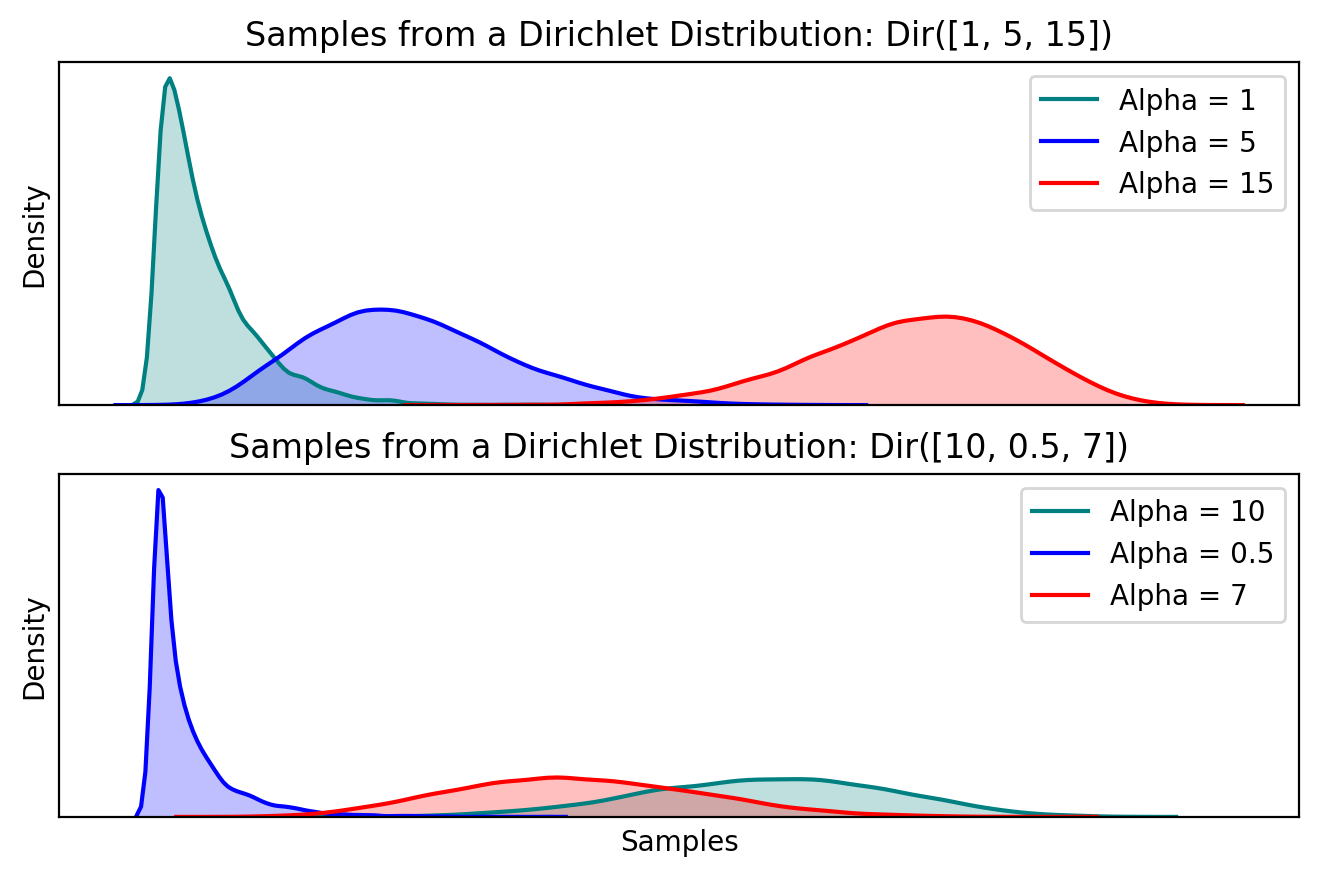

In [86]:
dirich_samples = pd.DataFrame(dirichlet.rvs(alpha = [1, 5, 15], size = 10000))

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 5), sharex = True)

sns.distplot(dirich_samples[0], 
             kde_kws = {"label": "Alpha = 1", "shade": True}, 
             color = "teal",
             hist = False,
             ax = ax[0],
             kde = True)
sns.distplot(dirich_samples[1], 
             kde_kws = {"label": "Alpha = 5", "shade": True}, 
             color = "blue",
             hist = False,
             ax = ax[0],
             kde = True);
sns.distplot(dirich_samples[2], 
             kde_kws = {"label": "Alpha = 15", "shade": True}, 
             color = "red",
             hist = False,
             ax = ax[0],
             kde = True);
ax[0].set_title("Samples from a Dirichlet Distribution: Dir([1, 5, 15])");
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[0].set_xlabel("");
ax[0].set_ylabel("Density");

dirich_samples = pd.DataFrame(dirichlet.rvs(alpha = [10, 0.5, 7], size = 10000))
sns.distplot(dirich_samples[0], 
             kde_kws = {"label": "Alpha = 10", "shade": True}, 
             color = "teal",
             hist = False,
             ax = ax[1],
             kde = True)
sns.distplot(dirich_samples[1], 
             kde_kws = {"label": "Alpha = 0.5", "shade": True}, 
             color = "blue",
             hist = False,
             ax = ax[1],
             kde = True);
sns.distplot(dirich_samples[2], 
             kde_kws = {"label": "Alpha = 7", "shade": True}, 
             color = "red",
             hist = False,
             ax = ax[1],
             kde = True);
ax[1].set_title("Samples from a Dirichlet Distribution: Dir([10, 0.5, 7])");
ax[1].set_xlabel("Samples")
ax[1].set_yticks([])
ax[1].set_ylabel("Density");

In [12]:
# each sample from the Dirichlet distribution sums to 1
dirich_samples[0] + dirich_samples[1] + dirich_samples[2]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
9995    1.0
9996    1.0
9997    1.0
9998    1.0
9999    1.0
Length: 10000, dtype: float64